In [43]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns

# Load datasets
graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
students_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/students-major-data.csv', sep=';')

# Define key variables for analysis
P_WOJ = graduates_data['P_WOJ']  # Województwo lokalizacji jednostki dydaktycznej
P_ME_ZAR = graduates_data['P_ME_ZAR']  # Mediana wynagrodzeń absolwentów
P_WWZ = graduates_data['P_WWZ']  # Względny Wskaźnik Zarobków
P_WWB = graduates_data['P_WWB']  # Względny Wskaźnik Bezrobocia
P_WWB_DOSW = graduates_data['P_WWB_DOSW']  # Wskaźnik Bezrobocia dla absolwentów z doświadczeniem
P_WWB_NDOSW = graduates_data['P_WWB_NDOSW']  # Wskaźnik Bezrobocia dla absolwentów bez doświadczenia
P_CZAS_PRACA_DOSW = graduates_data['P_CZAS_PRACA_DOSW']  # Czas do pierwszej pracy dla absolwentów z doświadczeniem
P_CZAS_PRACA_NDOSW = graduates_data['P_CZAS_PRACA_NDOSW']  # Czas do pierwszej pracy dla absolwentów bez doświadczenia
P_ME_ZAR_DOSW = graduates_data['P_ME_ZAR_DOSW']  # Mediana wynagrodzeń dla absolwentów z doświadczeniem
P_ME_ZAR_NDOSW = graduates_data['P_ME_ZAR_NDOSW']  # Mediana wynagrodzeń dla absolwentów bez doświadczenia
P_N = students_data['P_N']  # Liczba studentów
P_ABS = graduates_data['P_N'] # Liczba absolwentów
P_POZIOM = graduates_data['P_POZIOM']  # Poziom studiów
P_FORMA = graduates_data['P_FORMA']  # Forma studiów
P_ROKDYP = graduates_data['P_ROKDYP'] # Rok ukończenia studiów
P_ROK_OD = students_data['P_ROK_OD'] # Rok rozpoczęcia studiów
P_KIERUNEK_NAZWA = graduates_data['P_KIERUNEK_NAZWA'] # Pełna nazwa kierunku
P_ME_ZAR_P1 = graduates_data['P_ME_ZAR_P1'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 1 roku po uzyskaniu dyplomu
P_ME_ZAR_P2 = graduates_data['P_ME_ZAR_P2'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 2 roku po uzyskaniu dyplomu
P_ME_ZAR_P3 = graduates_data['P_ME_ZAR_P3'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 3 roku po uzyskaniu dyplomu
P_ME_ZAR_P4 = graduates_data['P_ME_ZAR_P4'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 4 roku po uzyskaniu dyplomu
P_ME_ZAR_P5 = graduates_data['P_ME_ZAR_P5'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 5 roku po uzyskaniu dyplomu
P_N_SEMESTR = graduates_data['P_N_SEMESTR'] # Liczba semestrów
P_NAZWA_UCZELNI = graduates_data['P_NAZWA_UCZELNI'] # Nazwa uczelni

/tmp/ipykernel_13136/706619090.py:6: DtypeWarning: Columns (13,14,15,16,17,18,19,57,59,61,63,65,67,81,83,85,87,89,91,105,106,108,109,111,112,114,115,117,118,120,121,135,136,138,139,141,142,144,145,147,148,150,151,165,166,168,169,171,172,174,175,177,178,180,181,195,196,198,199,201,202,204,205,207,208,210,211,225,226,229,230,232,233,235,236,238,239,241,242,256,257,259,260,262,263,265,266,268,269,271,272,288,299,300,301,303,304,306,307,309,310,312,313,315,316,330,331,337,338,340,341,343,344,346,347,349,350,364,365,367,368,370,371,373,374,376,377,379,380,394,395,403,404,406,407,409,410,412,413,415,416,430,431,433,434,436,437,439,440,442,443,445,446) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
/tmp/ipykernel_13136/706619090.py:7: DtypeWarning: Columns (9,18,23,30,64,71,78,85,92,99,106,113,120) have mixed types. Specify dtype option on import or set low_memory=F

In [52]:
# Create dictionaries to hold the values for P_WWZ_MIES and P_WWB_MIES for months 1 to 60
P_WWZ_MIES = {}
P_WWB_MIES = {}

# Dynamically read the columns and store them in dictionaries
for i in range(1, 61):
    P_WWZ_MIES[i] = graduates_data[f'P_WWZ_MIES_{i}']  # Read P_WWZ_MIES_{i}
    P_WWZ_MIES[i] = P_WWZ_MIES[i].str.replace(',', '.').astype(float)
    P_WWB_MIES[i] = graduates_data[f'P_WWB_MIES_{i}']  # Read P_WWB_MIES_{i}
    P_WWB_MIES[i] = P_WWB_MIES[i].str.replace(',', '.').astype(float)

In [ ]:
for i in range(1, 61):
    graduates_data = graduates_data.dropna(subset=[f'P_WWZ_MIES_{i}', f'P_WWB_MIES_{i}'])

# print(P_WWZ_MIES[1])
# graduates_data.shape

In [55]:
print(P_WWZ_MIES[1])

0        0.30
2        0.47
3        0.55
4        0.50
5        0.33
         ... 
62940    0.55
62941    0.64
62942    0.96
62944    1.06
62945    0.69
Name: P_WWZ_MIES_1, Length: 31125, dtype: float64


In [13]:
# Convert columns in graduates_data
for col in graduates_data.columns:
    if any(keyword in col for keyword in ['P_ME', 'P_WWZ', 'P_WWB']):
        graduates_data[col] = graduates_data[col].str.replace(',', '.').astype(float)

In [11]:
# Import additional necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Data exploration (optional: check for missing values and basic statistics)
print(graduates_data.describe())
# print(graduates_data.isnull().sum())

# # Handling missing values (if any)
graduates_data = graduates_data.dropna(subset=['P_WWB', 'P_ME_ZAR', 'P_WWB_DOSW', 'P_WWB_NDOSW'])

print("AFTER")
print(graduates_data.describe())

# # Define features (X) and target variable (y) for regression
# X = graduates_data[['P_WWB', 'P_WWB_DOSW', 'P_WWB_NDOSW']]  # Select features
# y = graduates_data['P_ME_ZAR']  # Target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Normalize the data (important for SVR)
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()

# X_train_scaled = scaler_X.fit_transform(X_train)
# X_test_scaled = scaler_X.transform(X_test)
# y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# # Initialize and train the SVR model
# svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # RBF kernel
# svr.fit(X_train_scaled, y_train_scaled)

# # Make predictions
# y_pred_scaled = svr.predict(X_test_scaled)

# # Reshape y_pred_scaled to 2D before inverse_transform
# y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"R-squared (R2): {r2}")

# # Visualize actual vs predicted values
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
# plt.xlabel('Actual Median Salary')
# plt.ylabel('Predicted Median Salary')
# plt.title('SVR: Predicted vs Actual Median Salaries')
# plt.legend()
# plt.show()

           P_ROKDYP  P_KIERUNEK_ID           P_N     P_N_WZUS   P_N_POZAZUS  \
count  48884.000000   48884.000000  48884.000000  48884.00000  48884.000000   
mean    2018.058874   33455.667990     52.374662     49.64111      2.733553   
std        2.555317   48502.328772     52.370758     50.77415      6.450469   
min     2014.000000    1002.000000     10.000000      3.00000      0.000000   
25%     2016.000000    4312.000000     21.000000     20.00000      0.000000   
50%     2018.000000    7645.000000     36.000000     34.00000      1.000000   
75%     2020.000000   14642.000000     64.000000     60.00000      3.000000   
max     2022.000000  142306.000000   1083.000000   1059.00000    186.000000   

       P_N_DOSW_REKR  P_N_DOSW_STUDIA     P_N_NDOSW  P_CZAS_PRACA_Q1  \
count   48884.000000     48884.000000  48884.000000     48884.000000   
mean       13.687832         9.412937     29.273893         0.780460   
std        26.321086        15.149315     35.395440         2.106642   


/tmp/ipykernel_13136/1319516965.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


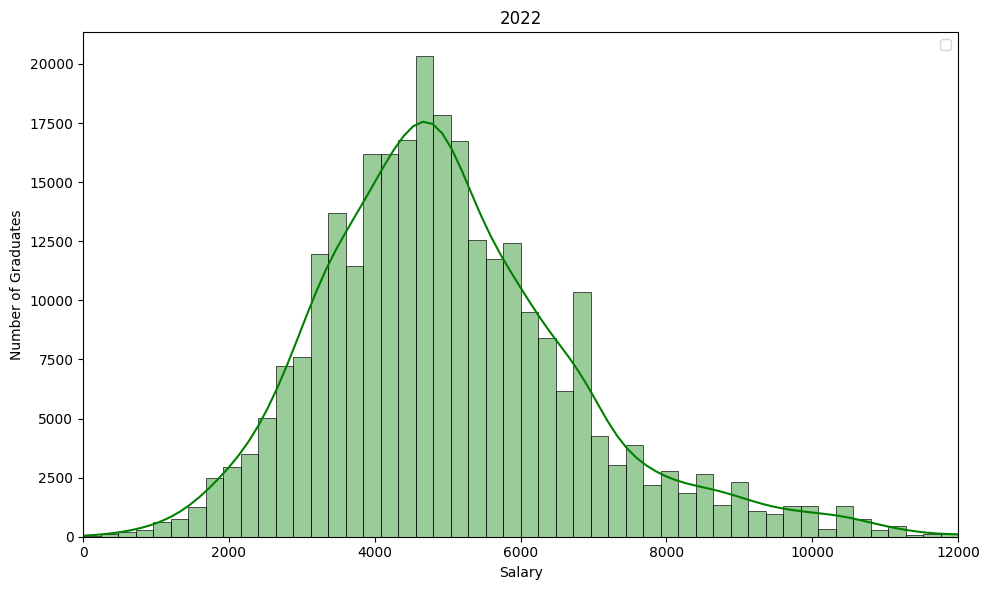

In [17]:

desired_year = 2022  # Replace with your desired graduation year
num_bins = 50
x_range = (0, 12000)

# Create a temporary DataFrame to avoid modifying graduates_data and include relevant columns
temp_data = graduates_data[['P_ME_ZAR', 'P_N', 'P_WOJ', 'P_ROKDYP']].copy()

# Filter data for the year 2022
temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]

plt.figure(figsize=(10, 6))
sns.histplot(
    data=temp_data, 
    x='P_ME_ZAR', 
    weights='P_N', 
    color='green',
    alpha=0.4,
    stat='count',
    bins=num_bins,
    binrange=x_range, 
    kde=True
)

plt.title(f"{desired_year}")
plt.xlim(x_range)
plt.xlabel("Salary")
plt.ylabel("Number of Graduates")
plt.legend()

plt.tight_layout()
plt.show()
